# 2Курсовой проект для курса "Python для Data Science"

### Автор: Молчанов Виталий

Задание: Используя данные из обучающего датасета (train.csv), построить модель для предсказания цен на недвижимость (квартиры). С помощью полученной модели, предсказать цены для квартир из тестового датасета (test.csv).

Целевая переменная: Price

Метрика качества: R2 - коэффициент детерминации (sklearn.metrics.r2_score)

Требования к решению:

R2 > 0.65

In [1]:
import numpy as np
import pandas as pd

from scipy.stats import mode

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

TRAIN_DATASET_PATH = './train.csv'
TEST_DATASET_PATH = './test.csv'

In [2]:
df_test = pd.read_csv(TEST_DATASET_PATH, sep=',')
df_train = pd.read_csv(TRAIN_DATASET_PATH, sep=',')

## Обработка данных

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [4]:
df_test['DistrictId'] = df_test['DistrictId'].astype(str)
df_train['DistrictId']= df_train ['DistrictId'].astype(str)

In [5]:
df_train.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [6]:
df_train.drop(columns='Id', inplace=True)

## Количественные переменные

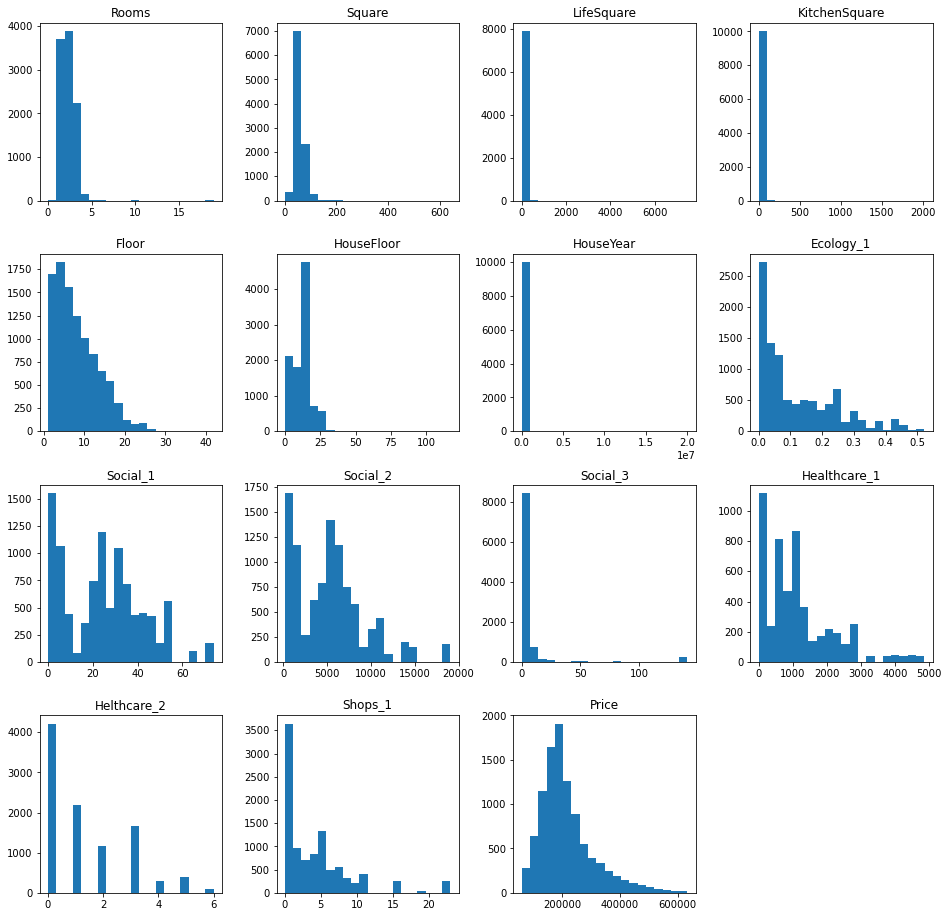

In [7]:
df_train.hist(figsize=(16,16), bins=20, grid=False);

## Категориальные переменные 

In [8]:
df_train['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

<AxesSubplot:xlabel='Price', ylabel='Ecology_2'>

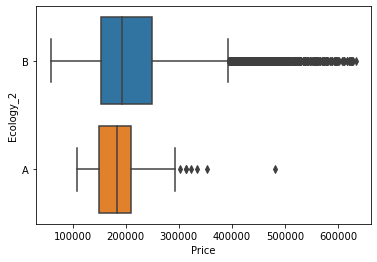

In [9]:
sns.boxplot('Price', 'Ecology_2', data=df_train)

In [10]:
df_train['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

<AxesSubplot:xlabel='Price', ylabel='Ecology_3'>

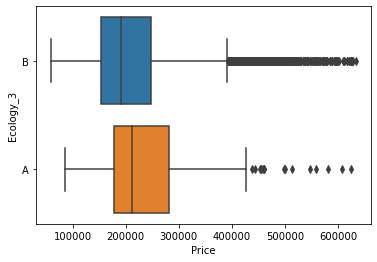

In [11]:
sns.boxplot('Price', 'Ecology_3', data=df_train)

In [12]:
df_train['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

<AxesSubplot:xlabel='Price', ylabel='Shops_2'>

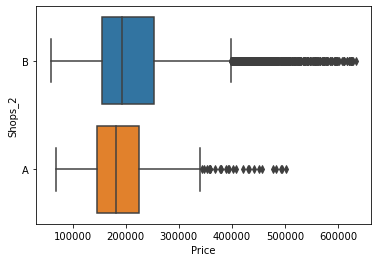

In [13]:
sns.boxplot('Price', 'Shops_2', data=df_train)

In [14]:
cat_names = ['Ecology_2', 'Ecology_3', 'Shops_2']
df_train[cat_names]=df_train[cat_names].replace({'A':0, 'B':1})
df_test[cat_names]=df_test[cat_names].replace({'A':0, 'B':1})

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  object 
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  int64  
 10  Ecology_3      10000 non-null  int64  
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  int64  
 18  Price  

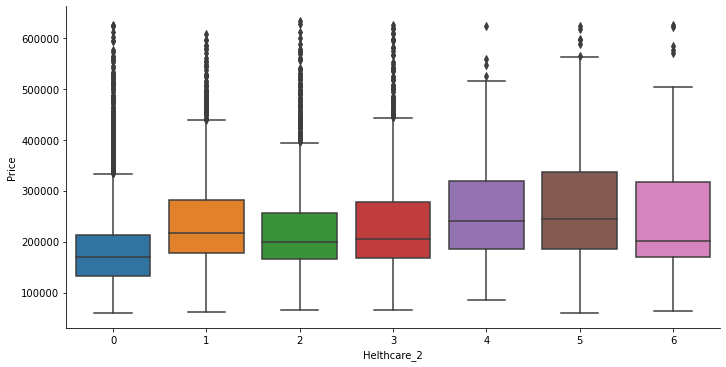

In [16]:
sns.catplot('Helthcare_2', 'Price', kind='box', data=df_train, aspect=2/1)

## Обработка пропусков

In [17]:
df_train.isna().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [18]:
df_train['Healthcare_1'].fillna(df_train['Healthcare_1'].median(), inplace=True)
df_test['Healthcare_1'].fillna(df_train['Healthcare_1'].median(), inplace=True)

In [21]:
df_train.loc[df_train['LifeSquare'].isna(), 'LifeSquare'] = \
    df_train['Square'] - df_train['KitchenSquare']
df_test.loc[df_test['LifeSquare'].isna(), 'LifeSquare'] = \
    df_test['Square'] - df_test['KitchenSquare']

In [22]:
df_train.isna().sum()

DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

## Количественные переменные

In [23]:
df_train['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

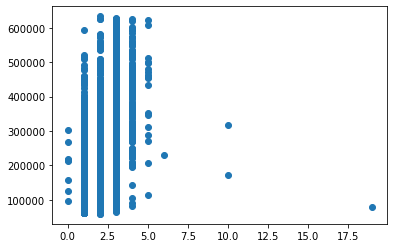

In [24]:
plt.scatter(df_train['Rooms'], df_train['Price'])

In [25]:
df_train.drop(df_train[df_train.Rooms > 5].index, inplace=True)

In [26]:
df_train.loc[df_train.Rooms == 0, 'Rooms'] = 2

In [27]:
df_train['Rooms'].value_counts()

2.0    3888
1.0    3705
3.0    2235
4.0     150
5.0      18
Name: Rooms, dtype: int64

In [28]:
df_test['Rooms'].value_counts()

2.0     2030
1.0     1769
3.0     1099
4.0       90
5.0        7
0.0        2
6.0        2
17.0       1
Name: Rooms, dtype: int64

In [29]:
df_test.loc[(df_test['Rooms'] > 5) | (df_test['Rooms'] == 0), 'Rooms'] = 2

In [30]:
df_train[['Square', 'LifeSquare', 'KitchenSquare']].describe()

,Square,LifeSquare,KitchenSquare
count,9996.000000,9996.000000,9996.000000
mean,56.316167,41.802683,6.272509
std,21.062369,77.838822,28.566582
min,1.136859,0.370619,0.000000
25%,41.773051,25.494155,1.000000
50%,52.509275,37.040829,6.000000
75%,65.905349,49.831651,9.000000
max,641.065193,7480.592129,2014.000000


In [31]:
df_train.loc[df_train['KitchenSquare'] > df_train['Square'], :]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1064,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,1,1,2,629,1,900.0,0,0,0,108337.484207
5149,42,1.0,38.071692,19.723548,73.0,9,10.0,2006,0.158249,1,1,21,5731,0,900.0,1,0,1,160488.033165
7088,27,1.0,38.220258,18.716856,84.0,4,17.0,2018,0.011654,1,1,4,915,0,900.0,0,0,1,99079.960518
8584,81,1.0,32.276663,19.278394,1970.0,6,1.0,1977,0.006076,1,1,30,5285,0,645.0,6,6,1,105539.556275


In [32]:
df_train.loc[df_train['KitchenSquare'] > df_train['Square'], 'KitchenSquare'] = df_train['KitchenSquare'].median()

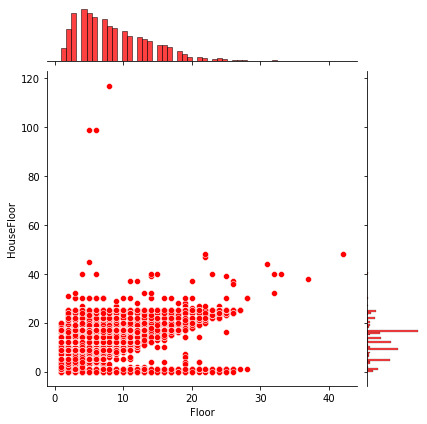

In [33]:
sns.jointplot(df_train['Floor'], df_train['HouseFloor'], kind='scatter', height=6, color='r')

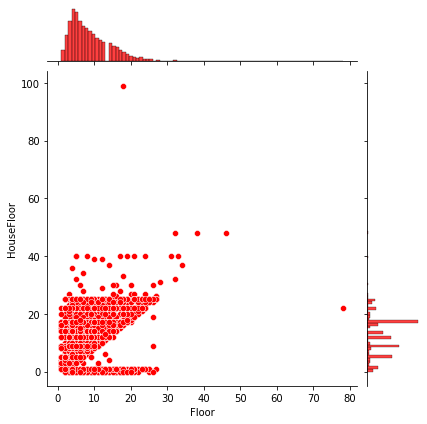

In [34]:
sns.jointplot(df_test['Floor'], df_test['HouseFloor'], kind='scatter', height=6, color='r')

In [35]:
floor_outliers_train = df_train.loc[df_train['Floor'] > df_train['HouseFloor']].index
floor_outliers_test = df_test.loc[df_test['Floor'] > df_test['HouseFloor']].index

In [36]:
df_train.loc[floor_outliers_train, 'Floor'] = df_train.loc[floor_outliers_train, 'HouseFloor']
df_test.loc[floor_outliers_test, 'Floor'] = df_test.loc[floor_outliers_test, 'HouseFloor']

In [37]:
df_train['HouseYear'].sort_values (ascending=False)

1497    20052011
4189        4968
2493        2020
4053        2020
3859        2020
          ...   
7611        1916
910         1914
2656        1912
5111        1912
9317        1910
Name: HouseYear, Length: 9996, dtype: int64

In [38]:
df_train.loc[df_train['HouseYear']>2020, 'HouseYear'] = 2011

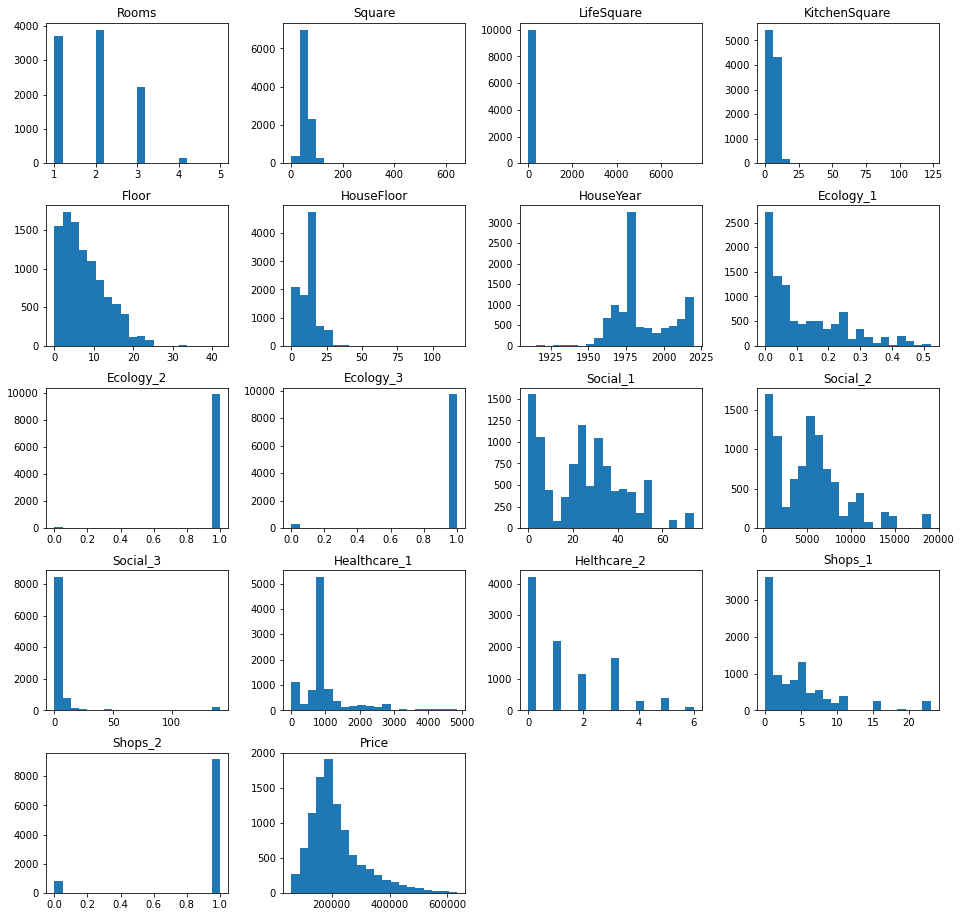

In [39]:
df_train.hist(figsize=(16,16), bins=20, grid=False);

In [40]:
df_train.isna().sum()

DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

In [41]:
df_train.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,1.888355,56.316167,41.802683,5.860644,7.698679,12.609444,1984.866647,0.118876,0.990296,0.972489,24.680272,5350.740896,8.042017,1026.454282,1.319028,4.230192,0.917467,214144.753182
std,0.811215,21.062369,77.838822,5.071089,5.302065,6.775609,18.413024,0.119040,0.098034,0.163575,17.522709,4004.582192,23.836223,746.737719,1.493277,4.805838,0.275189,92874.147847
min,1.000000,1.136859,0.370619,0.000000,0.000000,0.000000,1910.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.773051,25.494155,1.000000,4.000000,9.000000,1974.000000,0.017647,1.000000,1.000000,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,1.000000,153872.633942
50%,2.000000,52.509275,37.040829,6.000000,7.000000,13.000000,1977.000000,0.075424,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,1.000000,192269.644879
75%,2.000000,65.905349,49.831651,9.000000,11.000000,17.000000,2001.000000,0.195781,1.000000,1.000000,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,1.000000,249135.462171
max,5.000000,641.065193,7480.592129,123.000000,42.000000,117.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570


In [43]:
# Разделение датасета
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score

# Модели
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

# Метрики качества
from sklearn.metrics import mean_squared_error as mse, r2_score as r2, accuracy_score


In [44]:
df_train.columns.tolist()

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price']

In [139]:
feature_names = [
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 #'Ecology_2',
 #'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 #'Shops_2',              
 ]

target_name = 'Price'

In [140]:
X = df_train[feature_names]
y = df_train[target_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=42)

In [141]:
def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()

R2:	0.854
RMSE:	35322.302
MSE:	1247664983.812


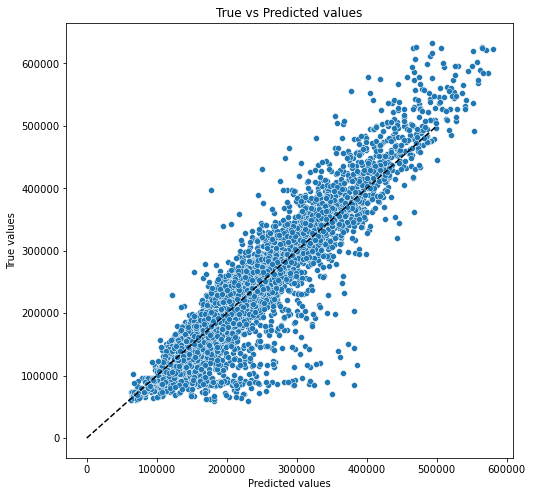

In [148]:
gb_model = GradientBoostingRegressor(criterion='mse',
                                     min_samples_leaf=5,
                                     random_state=42,  
                                     n_estimators=130,
                                     max_depth=5)
gb_model.fit(X_train, y_train)

y_train_preds = gb_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.762
RMSE:	45847.364
MSE:	2101980742.263


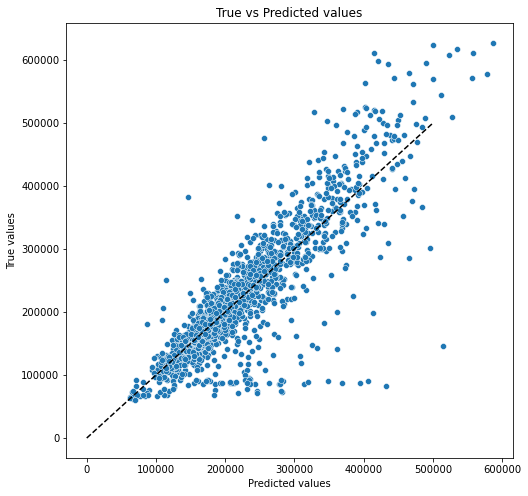

In [149]:
y_test_preds = gb_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

In [150]:
gb_model.fit(X, y)

GradientBoostingRegressor(criterion='mse', max_depth=5, min_samples_leaf=5,
                          n_estimators=130, random_state=42)

# Предсказание цен на тестовом датасете

In [151]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   object 
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     5000 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   float64
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   int64  
 11  Ecology_3      5000 non-null   int64  
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   5000 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [165]:
df_test.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2']

In [166]:
feature_names2 = [
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 #'Ecology_2',
 #'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 #'Shops_2'
]

In [167]:
df_test[feature_names2].head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
0,58,2.0,49.882643,33.432782,6.0,6.0,14.0,1972,0.310199,11,2748,1,900.0,0,0
1,74,2.0,69.263183,68.263183,1.0,1.0,1.0,1977,0.075779,6,1437,3,900.0,0,2
2,190,1.0,13.597819,15.948246,12.0,2.0,5.0,1909,0.000000,30,7538,87,4702.0,5,5
3,47,2.0,73.046609,51.940842,9.0,22.0,22.0,2007,0.101872,23,4583,3,900.0,3,3
4,27,1.0,47.527111,43.387569,1.0,17.0,17.0,2017,0.072158,2,629,1,900.0,0,0


In [168]:
y_test_preds = gb_model.predict(df_test[feature_names2])

In [171]:
df_test['Price'] = y_test_preds
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   object 
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     5000 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   float64
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   int64  
 11  Ecology_3      5000 non-null   int64  
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   5000 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [173]:
df_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,725,58,2.0,49.882643,33.432782,6.0,6.0,14.0,1972,0.310199,1,1,11,2748,1,900.0,0,0,1,151552.156746
1,15856,74,2.0,69.263183,68.263183,1.0,1.0,1.0,1977,0.075779,1,1,6,1437,3,900.0,0,2,1,208236.920453
2,5480,190,1.0,13.597819,15.948246,12.0,2.0,5.0,1909,0.000000,1,1,30,7538,87,4702.0,5,5,1,222757.572875
3,15664,47,2.0,73.046609,51.940842,9.0,22.0,22.0,2007,0.101872,1,1,23,4583,3,900.0,3,3,1,371972.864456
4,14275,27,1.0,47.527111,43.387569,1.0,17.0,17.0,2017,0.072158,1,1,2,629,1,900.0,0,0,0,132004.330515


In [174]:
df_test[['Id','Price']].head()

,Id,Price
0,725,151552.156746
1,15856,208236.920453
2,5480,222757.572875
3,15664,371972.864456
4,14275,132004.330515


In [175]:
df_test[['Id','Price']].to_csv('VMolchanov_predictions.csv', index=False)